# Scraping sobre ai-jobs.net

## Librerias

In [1169]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from itertools import zip_longest

import missingno as msno

from sklearn.preprocessing import LabelEncoder
import re

## Conexión a JOBS_URL

In [1170]:
# pagina de ai-jobs.net sobre analyst, etc.
JOBS_URL = 'https://ai-jobs.net/?cat=12&cat=10&cat=3&cat=6&cat=2&cat=5&cat=15&cat=16&key=&exp='

In [1171]:
# conectarse a la URL
response = requests.get(JOBS_URL)

In [1172]:
try:
    response = requests.get(JOBS_URL)
    response.raise_for_status()  # Lanza una excepción si el código de estado no es 200
    print('Conectado...')
except requests.exceptions.HTTPError as err:
    print(f'Error: {err}')
except requests.exceptions.RequestException as e:
    print(f'Error de conexión: {e}')

Conectado...


## BeautifulSoup

In [1173]:
soup = BeautifulSoup(response.content, 'html.parser')

In [1174]:
results = soup.find('ul', {'class':'list-group list-group-flush mb-4'}).find_all('li', {'class': 'list-group-item list-group-item-action p-1'})

results[0]

<li class="list-group-item list-group-item-action p-1">
<div class="row">
<div class="col-2 col-sm-1 py-2">
<a href="/jobs-at-the-wild-neighbors-database-project/" title="Show all open positions at The Wild Neighbors Database Project">
<img alt="The Wild Neighbors Database Project logo" class="mx-auto my-1 d-block" height="48" loading="lazy" src="/media/cache/b3/99/b399910c288f467c84225492514893ba.jpg" width="48"/>
</a>
<div class="d-flex justify-content-center mt-3">
<a class="btn-direct-apply text-body-emphasis p-1" href="mailto:devin.dombrowski@wildneighborsdp.org?subject=Remote%20AI/ML%20Engineer%20in%20Wildlife%20Conservation at The%20Wild%20Neighbors%20Database%20Project (via ai-jobs.net)" id="47153" title="Apply for this job directly via email: devin.dombrowski@wildneighborsdp.org"><i class="fas fa-edit"></i></a>
<a class="btn-direct-apply text-body-emphasis p-1" href="/job/mark/47153/create/" rel="nofollow" title="Save this job for later application"><i class="fas fa-list-ol"><

### Glosario
- jobs_title = publicacion de trabajo
- level = Senior, Junior, etc
- job_type = fulltime, freelance, etc
- salary_range = en dolar
- benefits = beneficios auxiliares
- onsite_remote = si es o no remoto
- category_name =  data engineer, etc
- company_name = nombre de la empresa
- location_name = pais
- skill_name = python, sql, etc

### Buscamos uno por uno las etiquetas

In [1175]:
jobs_title = results[0].find('h3', {'class': 'h5 mb-2 text-body-emphasis'}).get_text()
jobs_title

'Remote AI/ML Engineer in Wildlife Conservation'

In [1176]:
level = results[1].find('span', {'class': 'badge rounded-pill text-bg-info my-md-1 d-none d-md-inline-block'}).get_text()
level

'Senior-level'

In [1177]:
job_type = results[0].find('span', {'class': 'badge rounded-pill text-bg-secondary my-md-1 ms-1'}).get_text()
job_type

'Contract'

In [1178]:
salary_range = results[0].find('span', {'class': 'badge rounded-pill text-bg-success d-none d-md-inline-block'}).get_text()
salary_range

'USD 25K - 30K'

In [1179]:
# tener cuidado con los datos faltantes
def benefits_list():
    for result in results:
        benefits = results[4].find_all('span', {'class': 'badge rounded-pill text-bg-success'})
    for benefit in benefits:
        print(benefit.get_text())
# benefits

In [1180]:
# En esta pagina se encuentra en el dato del pais. hay que encontrar esa "remote" en la seccion de location_name
# onsite_remote

In [1181]:
# Hay que encontrarlo dentro de "jobs_title"
# category_name

In [1182]:
company_name = results[1].find('p', {'class': 'm-0 text-muted'}).get_text()
company_name

'White Wind Research'

In [1183]:
location_name = results[0].find('span', {'class': 'd-none d-md-block text-break'}).get_text()
location_name

'Remote, US'

In [1184]:
for result in results:
    skill_names = result.find_all('span', {'class': 'badge rounded-pill text-bg-light'})
for skill_name in skill_names:
    print(skill_name.get_text())
# skill_names

Airflow
APIs
Architecture
Business Analytics
Computer Science
Data analysis
Data Analytics
+34


In [1185]:
### Crear un DataFrame con las etiquetas que se vieron arriba

In [1186]:
# Crear Listas

# tabla fact
job_title = []
level = []
job_type = []
salary_range = []
benefits = []
onsite_remote = []

# tablas dims
company_name = []
location_name = []
category_name = []
skill_name = []

In [1187]:
# Crear un loop para extraer cada fila de data
for result in results:
    try:
        job_title.append(result.find('h3', {'class': 'h5 mb-2 text-body-emphasis'}).get_text()) 
    except:
        job_title.append('n/a')
    
    try:
        level.append(result.find('span', {'class': 'badge rounded-pill text-bg-info my-md-1 d-none d-md-inline-block'}).get_text()) 
    except:
        level.append('n/a')
    
    try:
        job_type.append(result.find('span', {'class': 'badge rounded-pill text-bg-secondary my-md-1 ms-1'}).get_text()) 
    except:
        job_type.append('n/a')
    
    
    try:
        salary_range.append(result.find('span', {'class': 'badge rounded-pill text-bg-success d-none d-md-inline-block'}).get_text()) 
    except:
        salary_range.append('n/a')
    
    try:
        benefits_list = [x.get_text() for x in result.find_all('span', {'class': 'badge rounded-pill text-bg-success'})]
        if not benefits_list:
            benefits.append('n/a')
        else:
            benefits_str = ', '.join(benefits_list)
            benefits.append(benefits_str)
    except:
        benefits.append('n/a')

    
    
    
    
    try:
        company_name.append(result.find('p', {'class': 'm-0 text-muted'}).get_text()) 
    except:
        company_name.append('n/a')
    
    try:
        location_name.append(result.find('span', {'class': 'd-none d-md-block text-break'}).get_text()) 
    except:
        location_name.append('n/a')
    
    try:
        skill_name_list = [x.get_text() for x in result.find_all('span', {'class': 'badge rounded-pill text-bg-light'})]
        if not skill_name_list:
            skill_name.append('n/a')
        else:
            skill_name_str = ', '.join(skill_name_list)
            skill_name.append(skill_name_str)
    except:
        skill_name.append('n/a')
    
    # try:
    #     skill_name.append([x.get_text() for x in result.find_all('span', {'class': 'badge rounded-pill text-bg-light'})])
    # except:
    #     skill_name.append('n/a')
print(skill_name[0])

APIs, Classification, Data management, GitHub, Keras, Machine Learning, ML models, +6


### Tabla

In [1188]:
# Agrupar listas en tuplas con zip_longest
data = zip_longest(job_title, level, job_type, salary_range, benefits, company_name, location_name, skill_name)

# Crear DataFrame directamente desde las tuplas
df = pd.DataFrame(data, columns=['job_title', 'level', 'job_type', 'salary_range', 'benefits', 'company_name', 'location_name', 'skill_name'])

In [1189]:
data = []

for row in df.itertuples(index=False):
    data.append(list(row))

data = list(zip_longest(*data, fillvalue='n/a')) 

JOB = pd.DataFrame({
    'job_title': data[0],
    'level': data[1],
    'job_type': data[2],
    'salary_range': data[3],
    'benefits': data[4],
    'company_name': data[5],
    'location_name': data[6],
    'skill_name': data[7]
})

In [1190]:
# print(JOB)

## Normalizacón

In [1191]:
JOB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   job_title      95 non-null     object
 1   level          95 non-null     object
 2   job_type       95 non-null     object
 3   salary_range   95 non-null     object
 4   benefits       95 non-null     object
 5   company_name   95 non-null     object
 6   location_name  95 non-null     object
 7   skill_name     95 non-null     object
dtypes: object(8)
memory usage: 6.1+ KB


In [1192]:
JOB.isnull()

,job_title,level,job_type,salary_range,benefits,company_name,location_name,skill_name
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
90,False,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False
93,False,False,False,False,False,False,False,False


<Axes: >

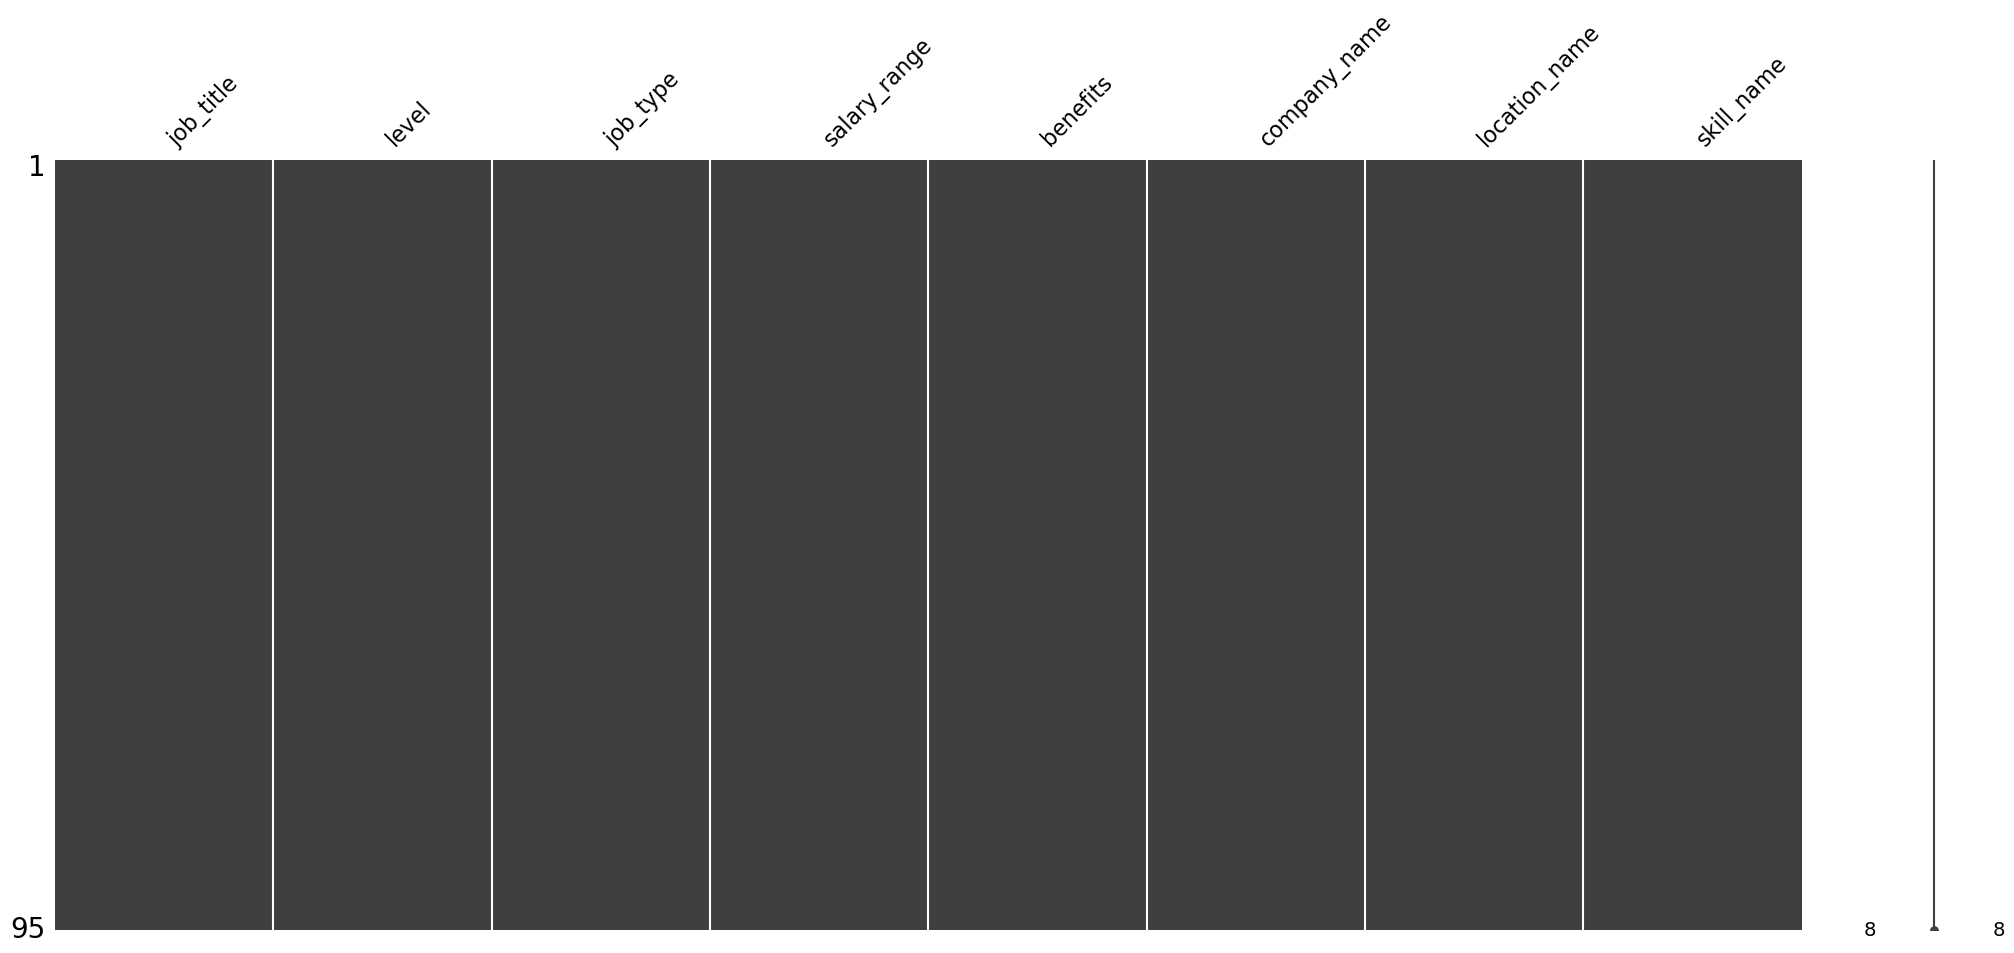

In [1193]:
# Visualizar los valores nulos en el dataframe
msno.matrix(df)

No tiene datos Nulos ya que en el scraping se establecio que si estaba nulo se llene con "n/a"

In [1194]:
# todo a minusculas
JOB = JOB.applymap(lambda x: x.lower() if type(x) == str else x)

In [1195]:
JOB.head(0)

,job_title,level,job_type,salary_range,benefits,company_name,location_name,skill_name


In [1196]:
# Rango salarial. Agregar una nueva columna salary_avg que contenga el promedio del rango en tipo de dato float
def get_salary_avg(salary_range):
    """
    Función para extraer los valores numéricos de la cadena y calcular el promedio.
    """
    # Extraer los valores numéricos
    salaries = re.findall(r'\d+', salary_range)
    
    # Calcular el promedio
    if len(salaries) == 2:
        salary_avg = (int(salaries[0]) + int(salaries[1])) / 2
    else:
        salary_avg = 0
        
    return salary_avg

# Aplicar la función a la columna 'salary_range' y crear una nueva columna 'salary_avg'
JOB['salary_avg'] = JOB['salary_range'].apply(get_salary_avg)

# Eliminar la columna 'salary_range'
JOB.drop(columns=['salary_range'], inplace=True)

# Cambiar orden de las columnas y renombrar la columna 'salary_avg' a 'salary_range'
# JOB = JOB.reindex(columns=[
#     'job_title',
#     'category',
#     'job_type',
#     'onsite_remote',
#     'location_name',
#     'salary_range',
#     'company_name'
# ])

# JOB.columns = [
#     'job_title',
#     'category',
#     'job_type',
#     'onsite_remote',
#     'location_name',
#     'salary_range',
#     'company_name'
# ]


# Creamos un csv
# JOB.to_csv('JOB.csv', index=False)

### Codificar las variables categóricas utilizando técnicas como one-hot encoding o label encoding.

In [1197]:
# Crear dataframe de ejemplo
dim_JobCategory = pd.DataFrame({
    'category_name': [
        'Data Scientist',
        'Data Engineer',
        'Machine Learning',
        'Data Analyst',
        'Others'
    ],
    'type': [
        'Data Engineer',
        'Data Analyst',
        'ML',
        'Others',
        'None'
    ]})

# Aplicar one-hot encoding a la variable 'job_type'
job_type_dummies = pd.get_dummies(dim_JobCategory['type'], prefix='_')

# Unir las columnas dummies al dataframe original
dim_JobCategory = pd.concat([dim_JobCategory, job_type_dummies], axis=1)

# Eliminar la columna original 'job_type'
dim_JobCategory.drop('type', axis=1, inplace=True)

# Mostrar el resultado
print(dim_JobCategory)

      category_name  __Data Analyst  __Data Engineer  __ML  __None  __Others
0    Data Scientist               0                1     0       0         0
1     Data Engineer               1                0     0       0         0
2  Machine Learning               0                0     1       0         0
3      Data Analyst               0                0     0       0         1
4            Others               0                0     0       1         0


### Agrega una columna dim_JobCategory con el cargo extraido de 

In [1198]:
# Definir la expresión regular para encontrar los títulos que hagan match
regex = re.compile(r'(engineer|analyst|ml)', flags=re.IGNORECASE)

# Crear una nueva columna 'dim_JobCategory' en el dataframe JOB, asignando 'data scientist' como valor por defecto.
JOB['dim_JobCategory'] = 'data scientist'

# Asignar la categoría correspondiente a los títulos que hagan match con la expresión regular
JOB.loc[JOB['job_title'].str.contains(regex), 'dim_JobCategory'] = JOB['job_title'].str.extract(regex, expand=False).str.lower()

# Mostrar el resultado
# JOB

/tmp/ipykernel_75162/833218681.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  JOB.loc[JOB['job_title'].str.contains(regex), 'dim_JobCategory'] = JOB['job_title'].str.extract(regex, expand=False).str.lower()


In [1199]:
# Definir la expresión regular para encontrar los títulos que hagan match
regex = re.compile(r'(remote)', flags=re.IGNORECASE)

# Crear una nueva columna 'onsite_remote' en el dataframe JOB, asignando 'onsite' como valor por defecto
JOB['onsite_remote'] = 'onsite'

# Asignar la categoría correspondiente a los títulos que hagan match con la expresión regular
JOB.loc[JOB['location_name'].str.contains(regex), 'onsite_remote'] = JOB['location_name'].str.extract(regex, expand=False).str.lower()

# Cambiar orden de las columnas y renombrar a columna '
JOB = JOB.reindex(columns=[
    'job_title',
    'level',
    'job_type',
    'salary_avg',
    'benefits',
    'onsite_remote',
    'dim_JobCategory',
    'company_name',
    'location_name',
    'skill_name',   
    
])

JOB.columns = ([
    'job_title',
    'level',
    'job_type',
    'salary_avg',
    'benefits',
    'onsite_remote',
    'dim_JobCategory',
    'dim_Company',
    'dim_Location',
    'dim_Skills',
])

# Crea un csv con toda la info
JOB.to_csv('./data/job.csv', index=False)

/tmp/ipykernel_75162/3568789087.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  JOB.loc[JOB['location_name'].str.contains(regex), 'onsite_remote'] = JOB['location_name'].str.extract(regex, expand=False).str.lower()
